# Linear Regression and Logistic Regression Modelling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from mlxtend.plotting import decision_regions
from mlxtend.plotting import plot_decision_regions
import sklearn.metrics as mlt

3157.5734769951287


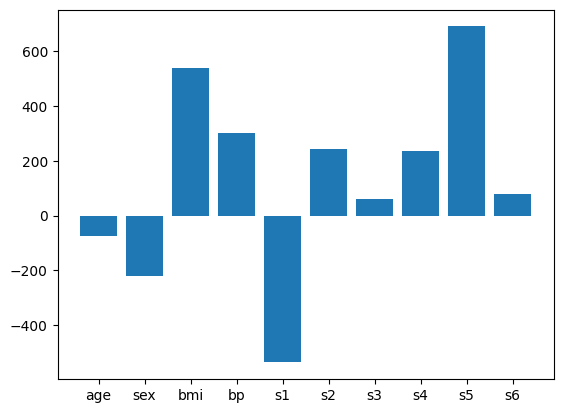

In [3]:
diabetes=load_diabetes()
X=diabetes.data
Y=diabetes.target

Xtrain,xtest,Ytrain, ytest=train_test_split(X,Y,test_size=0.3, random_state=12)
model= LinearRegression()
model.fit(Xtrain,Ytrain)
#print(model.coef_, model.intercept_)
ypred=model.predict(xtest)
print(mlt.mean_squared_error(ytest,ypred))
plt.bar(diabetes.feature_names,model.coef_);

<BarContainer object of 10 artists>

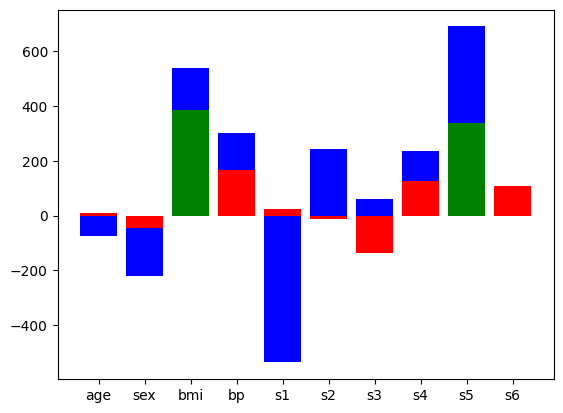

In [4]:
# Ridge and Lasso Linear Regression modelling: Its helpful for feature selection
model1= LinearRegression()
model1.fit(Xtrain,Ytrain)
plt.bar(diabetes.feature_names,model1.coef_, color='b')

model2= Ridge()
model2.fit(Xtrain,Ytrain)
plt.bar(diabetes.feature_names,model2.coef_, color='r')

model3= Lasso()
model3.fit(Xtrain,Ytrain)
plt.bar(diabetes.feature_names,model3.coef_, color='g')


0.9303939218549564


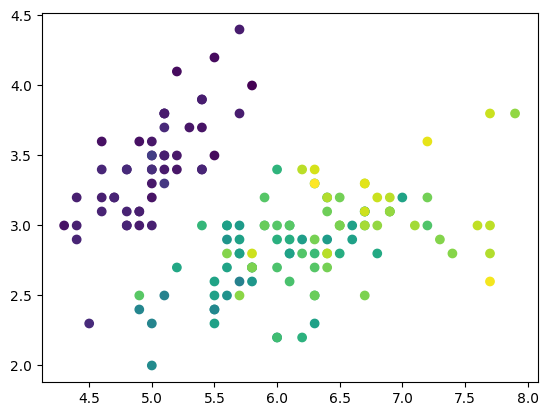

In [15]:
X=load_iris().data
Y=load_iris().target
model=LinearRegression()
model.fit(X,Y)
print(model.score(X,Y))
ypred= model.predict(X)
plt.scatter(X[:,0], X[:,1], c=ypred);

/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.9866666666666667


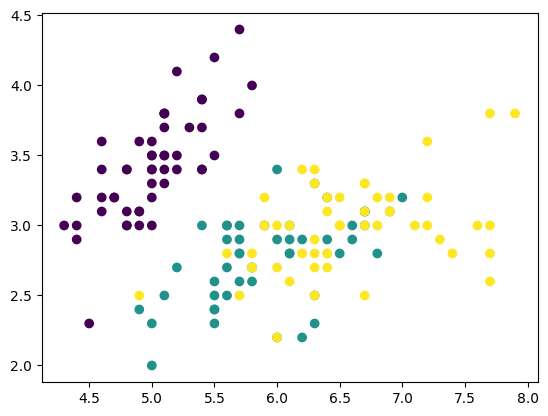

In [14]:
X=load_iris().data
y=load_iris().target
model=LogisticRegression(solver='sag', multi_class='multinomial')
model.fit(X,y)
print(model.score(X,Y))
ypred= model.predict(X)
plt.scatter(X[:,0], X[:,1], c=ypred);

/usr/local/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.022222222222222223


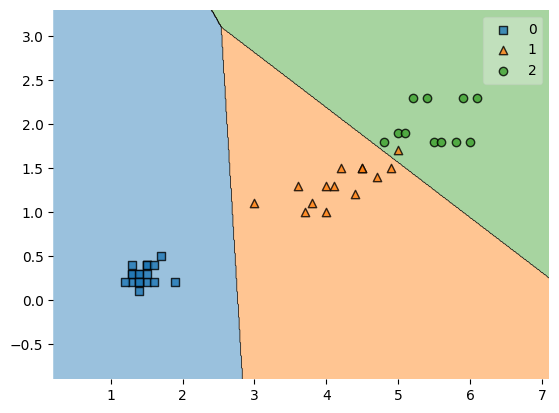

In [16]:
X=load_iris().data[:,[2,3]]
Y=load_iris().target
Xtrain, xtest, Ytrain, ytest=train_test_split(X,Y, test_size=0.3, random_state=12)
model=LogisticRegression(solver='sag', multi_class='multinomial', random_state=12)
model.fit(Xtrain,Ytrain)
ypred=model.predict(xtest)
print(mlt.mean_squared_error(ytest,ypred))
plot_decision_regions(xtest,ytest, clf=model);

<Axes: >

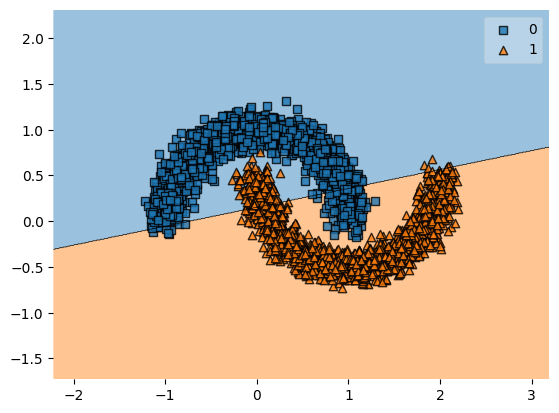

In [17]:
from sklearn.datasets import make_moons
X,Y=make_moons(n_samples=3000, noise=0.1)
model=LogisticRegression()
model.fit(X,Y)
plot_decision_regions(X,Y,model)

<Axes: >

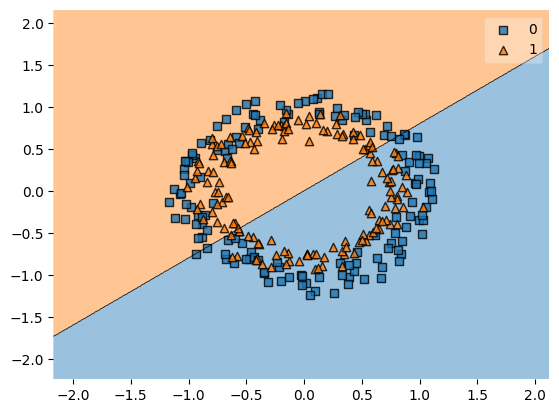

In [18]:
from sklearn.datasets import make_circles
X,Y=make_circles(n_samples=300, random_state=12, noise=0.1)
model=LogisticRegression(solver='sag', multi_class='multinomial')
model.fit(X,Y);
plot_decision_regions(X,Y,model)